# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. The full details for these papers can be found the course guide. Rozenberg et al and Hamarat et al are optional readings for this week. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [2]:
import pandas as pd
import numpy as np

In [2]:
from ema_workbench import ema_logging
from ema_workbench.analysis import prim
import matplotlib.pyplot as plt

ema_logging.log_to_stderr(ema_logging.INFO) 

C:\Users\newbi\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\newbi\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\newbi\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


<Logger EMA (DEBUG)>

In [3]:
df_bryant = pd.read_csv("data/Bryant et al 2010.csv", index_col=False)
df_bryant.head()

renew req %  Pricing  Cellulosic cost  Total biomass  \
0         0.25        1       124.900001     612.799988   
1         0.25        1        67.300003     837.200012   
2         0.25        1        71.000000     740.400024   
3         0.25        1        80.099998     995.599976   
4         0.25        1        76.400002     476.399994   

   Feedstock distribution  Cellulosic yield  Oil elasticity  \
0                    0.04         89.500000           0.206   
1                    0.18         95.900002           0.277   
2                    0.80         83.500000           0.445   
3                    0.58         82.400002           0.291   
4                    0.79         97.500000           0.443   

   Demand elasticity  Electricity coproduction  oil supply shift  \
0             -0.469                      1.83             0.078   
1             -0.380                      0.01            -0.032   
2             -0.778                      0.25            -0.093   
3             -0.334                      0.08            -0.086   
4             -0.205                      1.59             0.073   

   Biomass backstop price  input record  Expen change  Incremental cost  \
0              162.199997          1001         60.00            276.47   
1              150.300003          1002         19.42             85.07   
2              135.800003          1003         17.76            200.11   
3               98.800003          1004         37.88            130.86   
4              163.500000          1006         66.13            180.11   

   Less than 10%  Greater than 90%  
0              0                 0  
1              0                 0  
2              0                 0  
3              0                 0  
4              0                 0

In [4]:
x = df_bryant.iloc[:, 2:11]
y = df_bryant.iloc[:, 15]

In [8]:
#x = x.to_records()
y = y.values

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [6]:
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6


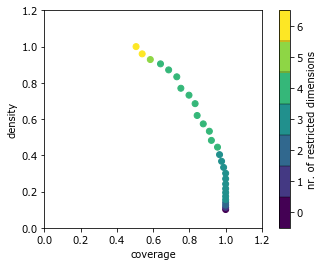

In [7]:
box1.show_tradeoff()
plt.show()

coverage     0.505618
density             1
id                 27
mass        0.0510204
mean                1
res_dim             6
Name: 27, dtype: object

                            box 27                                            
                               min         max                       qp values
Total biomass           450.000000  755.799988  [-1.0, 2.3170025284776066e-07]
oil supply shift         -0.100000    0.080500      [-1.0, 0.1533133614558316]
Cellulosic yield         80.000000   97.299999     [-1.0, 0.15929622601339163]
Demand elasticity        -0.384500   -0.202000   [1.707566113939849e-16, -1.0]
Biomass backstop price  162.150002  199.600006   [2.842170943040401e-14, -1.0]
Cellulosic cost          72.650002  133.699997     [0.14731492322805617, -1.0]



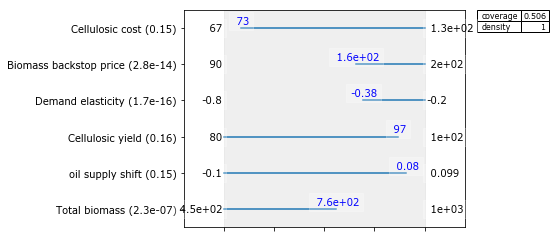

In [8]:
box1.inspect()
box1.inspect(style='graph')
plt.show()

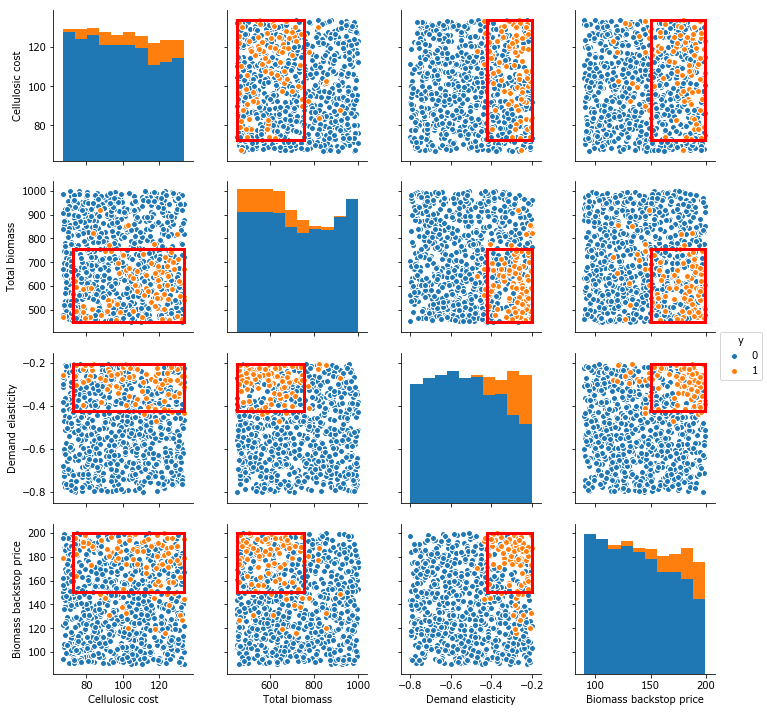

In [9]:
box1.show_pairs_scatter(21)
plt.show()

[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 0.8545454545454545, mass: 0.06235827664399093, coverage: 0.5280898876404494, density: 0.8545454545454545 restricted_dimensions: 3


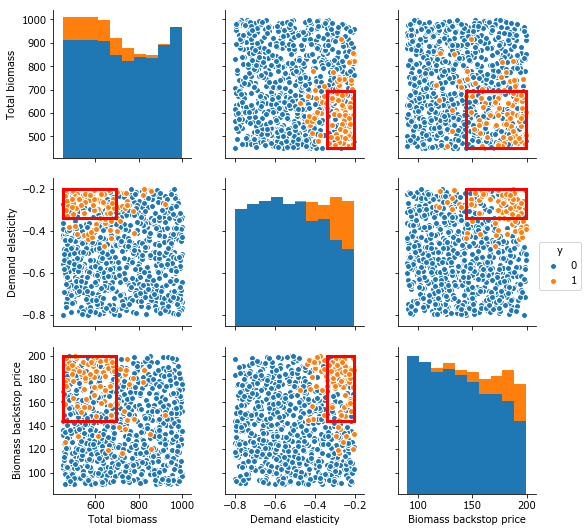

In [10]:
prim_alg_high = prim.Prim(x, y, threshold=0.8, peel_alpha=0.5)
box_high = prim_alg_high.find_box()

box_high.select(4)
fig = box_high.show_pairs_scatter()
plt.show()

In [11]:
from ema_workbench.analysis import cart
cart_alg = cart.CART(x,y, 0.05)
cart_alg.build_tree()

In [12]:
print(cart_alg.stats_to_dataframe())
print(cart_alg.boxes_to_dataframe())

       coverage   density      mass  res dim
box 1  0.011236  0.021739  0.052154        2
box 2  0.000000  0.000000  0.546485        2
box 3  0.000000  0.000000  0.103175        3
box 4  0.044944  0.090909  0.049887        3
box 5  0.224719  0.434783  0.052154        2
box 6  0.112360  0.227273  0.049887        3
box 7  0.000000  0.000000  0.051020        3
box 8  0.606742  0.642857  0.095238        2
                       box 1                  box 2               box 3  \
                         min         max        min         max     min   
Cellulosic yield        80.0   81.649994  81.649994   99.900002  80.000   
Demand elasticity       -0.8   -0.439000  -0.800000   -0.439000  -0.439   
Biomass backstop price  90.0  199.600006  90.000000  199.600006  90.000   
Cellulosic cost         67.0  133.699997  67.000000  133.699997  67.000   

                                         box 4                box 5  \
                               max         min         max      min   
Ce

In [13]:
#Install GraphViz and PyDot
cart_alg.show_tree()

AttributeError: 'list' object has no attribute 'create_png'

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


In [18]:
df_rozenberg = pd.read_csv("data/Rozenberg et al 2014.csv")
df_rozenberg.head()

inequalities  convergence  population  behaviors  technologies  fossils  \
0             0            2           0          0             0        0   
1             0            2           0          0             0        0   
2             0            2           0          0             0        1   
3             0            2           0          0             0        1   
4             0            2           0          0             1        0   

   capital markets  SSP1  SSP2  SSP3  SSP4  SSP5  
0                0     0     0     0     0     0  
1                1     0     0     0     0     0  
2                0     0     0     0     0     0  
3                1     0     0     0     0     0  
4                0     0     1     0     0     0

In [19]:
x = df_rozenberg.iloc[:, :6]
y_1 = df_rozenberg.iloc[:, 7]
y_2 = df_rozenberg.iloc[:, 8]
y_3 = df_rozenberg.iloc[:, 9]
y_4 = df_rozenberg.iloc[:, 10]
y_5 = df_rozenberg.iloc[:, 11]

In [20]:
prim_alg = prim.Prim(x, y_1, threshold=0.6, peel_alpha=0.05)
box1 = prim_alg.find_box()

[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 0.9375, mass: 0.055944055944055944, coverage: 0.3409090909090909, density: 0.9375 restricted_dimensions: 4


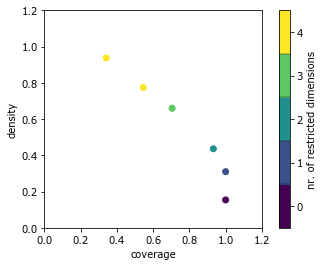

In [21]:
box1.show_tradeoff()
plt.show()

coverage     0.340909
density        0.9375
id                  5
mass        0.0559441
mean           0.9375
res_dim             4
Name: 5, dtype: object

             box 5                                    
               min  max                      qp values
population     0.0  0.0   [-1.0, 0.011071443574430165]
behaviors      1.0  1.0  [0.0009414028575075368, -1.0]
inequalities   1.0  1.0    [0.08236570519412031, -1.0]
convergence    1.0  2.0    [0.32186915036588915, -1.0]



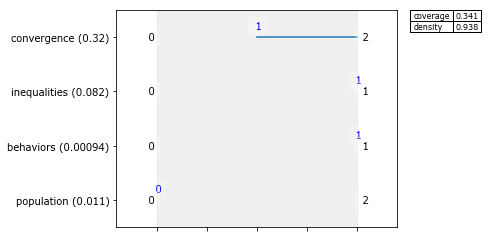

In [22]:
box1.inspect()
box1.inspect(style='graph')
plt.show()

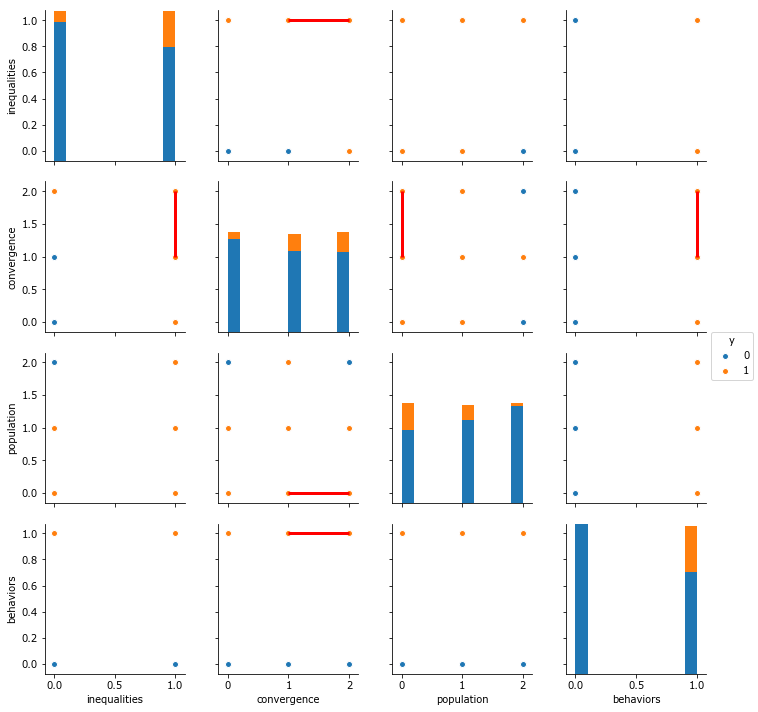

In [24]:
box1.show_pairs_scatter()
plt.show()

[MainProcess/INFO] 286 points remaining, containing 28 cases of interest
[MainProcess/INFO] mean: 0.5625, mass: 0.055944055944055944, coverage: 0.32142857142857145, density: 0.5625 restricted_dimensions: 4


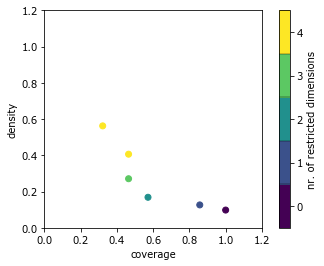

coverage     0.321429
density        0.5625
id                  5
mass        0.0559441
mean           0.5625
res_dim             4
Name: 5, dtype: object

             box 5                                   
               min  max                     qp values
population     0.0  0.0    [-1.0, 0.0129930355162259]
behaviors      0.0  0.0  [-1.0, 0.016766054367329357]
convergence    0.0  1.0   [-1.0, 0.09993748242742488]
inequalities   1.0  1.0   [0.06021846943525107, -1.0]



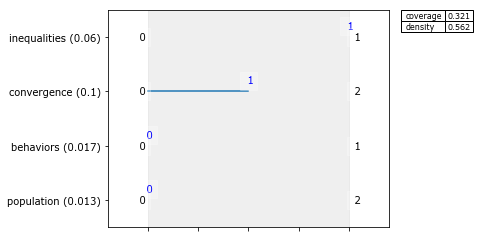

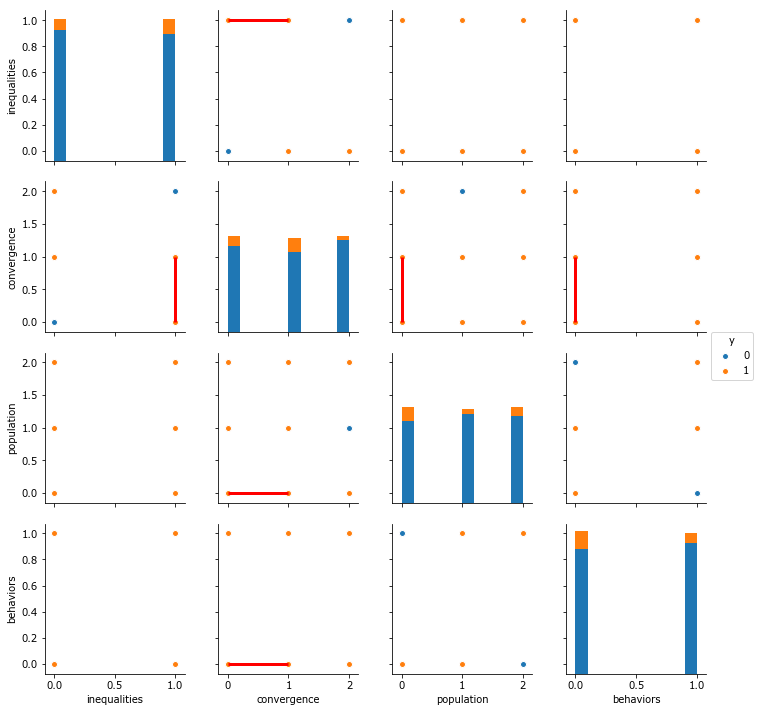

In [26]:
#The treshold that you specify is the density of the final block
#Look at the coverage for your minimum treshold! Find a density that is high enough
prim_alg = prim.Prim(x, y_2, threshold=0.3, peel_alpha=0.05)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

box1.inspect()
box1.inspect(style='graph')
plt.show()

box1.show_pairs_scatter()
plt.show()

# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [1]:
from ema_workbench import load_results
results = load_results('data/Hamarat et al 2013.gz')

In [5]:
x = results[0] #experiments
y = results[1]["fraction renewables"] #outcomes

In [65]:
#The outcomes should be binary so either 0 and 1. 
i=y[:,-1] < y[:,0]

In [66]:
i

array([ True, False, False, ..., False, False,  True])

In [16]:
l = []

#See the categories of the columns
x.dtypes

Cellulosic cost             float64
Total biomass               float64
Feedstock distribution      float64
Cellulosic yield            float64
Oil elasticity              float64
Demand elasticity           float64
Electricity coproduction    float64
oil supply shift            float64
Biomass backstop price      float64
dtype: object

In [109]:
#Rotate the axis so that the box will fit more with PCA
#Remove columns that are non numerical
rotated_experiments, rotation_matrix = prim.pca_preprocess(x, i, exclude=['model', 'policy', 
        'SWITCH Market price determination', 'SWITCH TGC obligation curve',
       'SWITCH carbon cap', 'SWITCH carbon price determination',
       'SWITCH economic growth', 'SWITCH electrification rate',
       'SWITCH interconnection capacity expansion', 'SWITCH lookup curve TGC',
       'SWITCH low reserve margin price markup', 'SWITCH physical limits',
       'SWITCH storage for intermittent supply',
       'SWTICH preference carbon curve'])

In [113]:
#prim_alg = prim.Prim(x, i, threshold=0.7)
#box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] 5000 points remaining, containing 871 cases of interest
[MainProcess/INFO] mean: 0.732824427480916, mass: 0.0524, coverage: 0.22043628013777267, density: 0.732824427480916 restricted_dimensions: 12


[MainProcess/INFO] 5000 points remaining, containing 871 cases of interest
[MainProcess/INFO] mean: 0.7717391304347826, mass: 0.0552, coverage: 0.24454649827784156, density: 0.7717391304347826 restricted_dimensions: 18


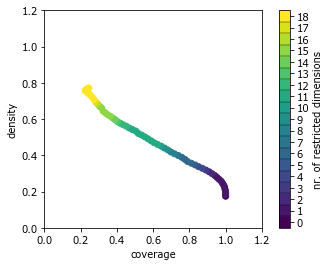

coverage    0.244546
density     0.771739
id                73
mass          0.0552
mean        0.771739
res_dim           18
Name: 73, dtype: object

        box 73                                                      
           min       max                                   qp values
r_17 -3.553679  0.857214               [-1.0, 0.0017312685560956036]
r_22 -3.498832  1.150033                 [-1.0, 0.05385302498220055]
r_26 -3.028003  1.599665                 [-1.0, 0.29933204082590137]
r_33  0.402816  3.377941              [5.5333179544450265e-34, -1.0]
r_30 -1.014106  1.510950  [0.018001888014358754, 0.2652958888670105]
r_29 -1.223537  1.515717  [0.043927392855947434, 0.2541949268519254]
r_20 -1.227859  1.323559   [0.06944164303325516, 0.1886473629621116]
r_32 -1.268447  1.478524  [0.07932430003205389, 0.17812088071007381]
r_27 -1.262287  1.539901   [0.08936139754074238, 0.2761191124929337]
r_18 -1.793685  3.904495                 [0.17869509550942222, -1.0]
r_31 -1.574811  3.391

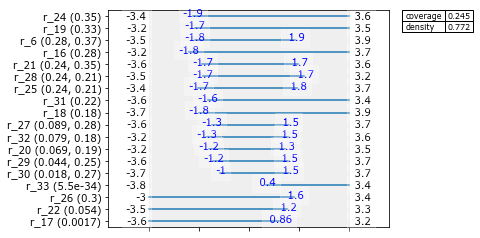

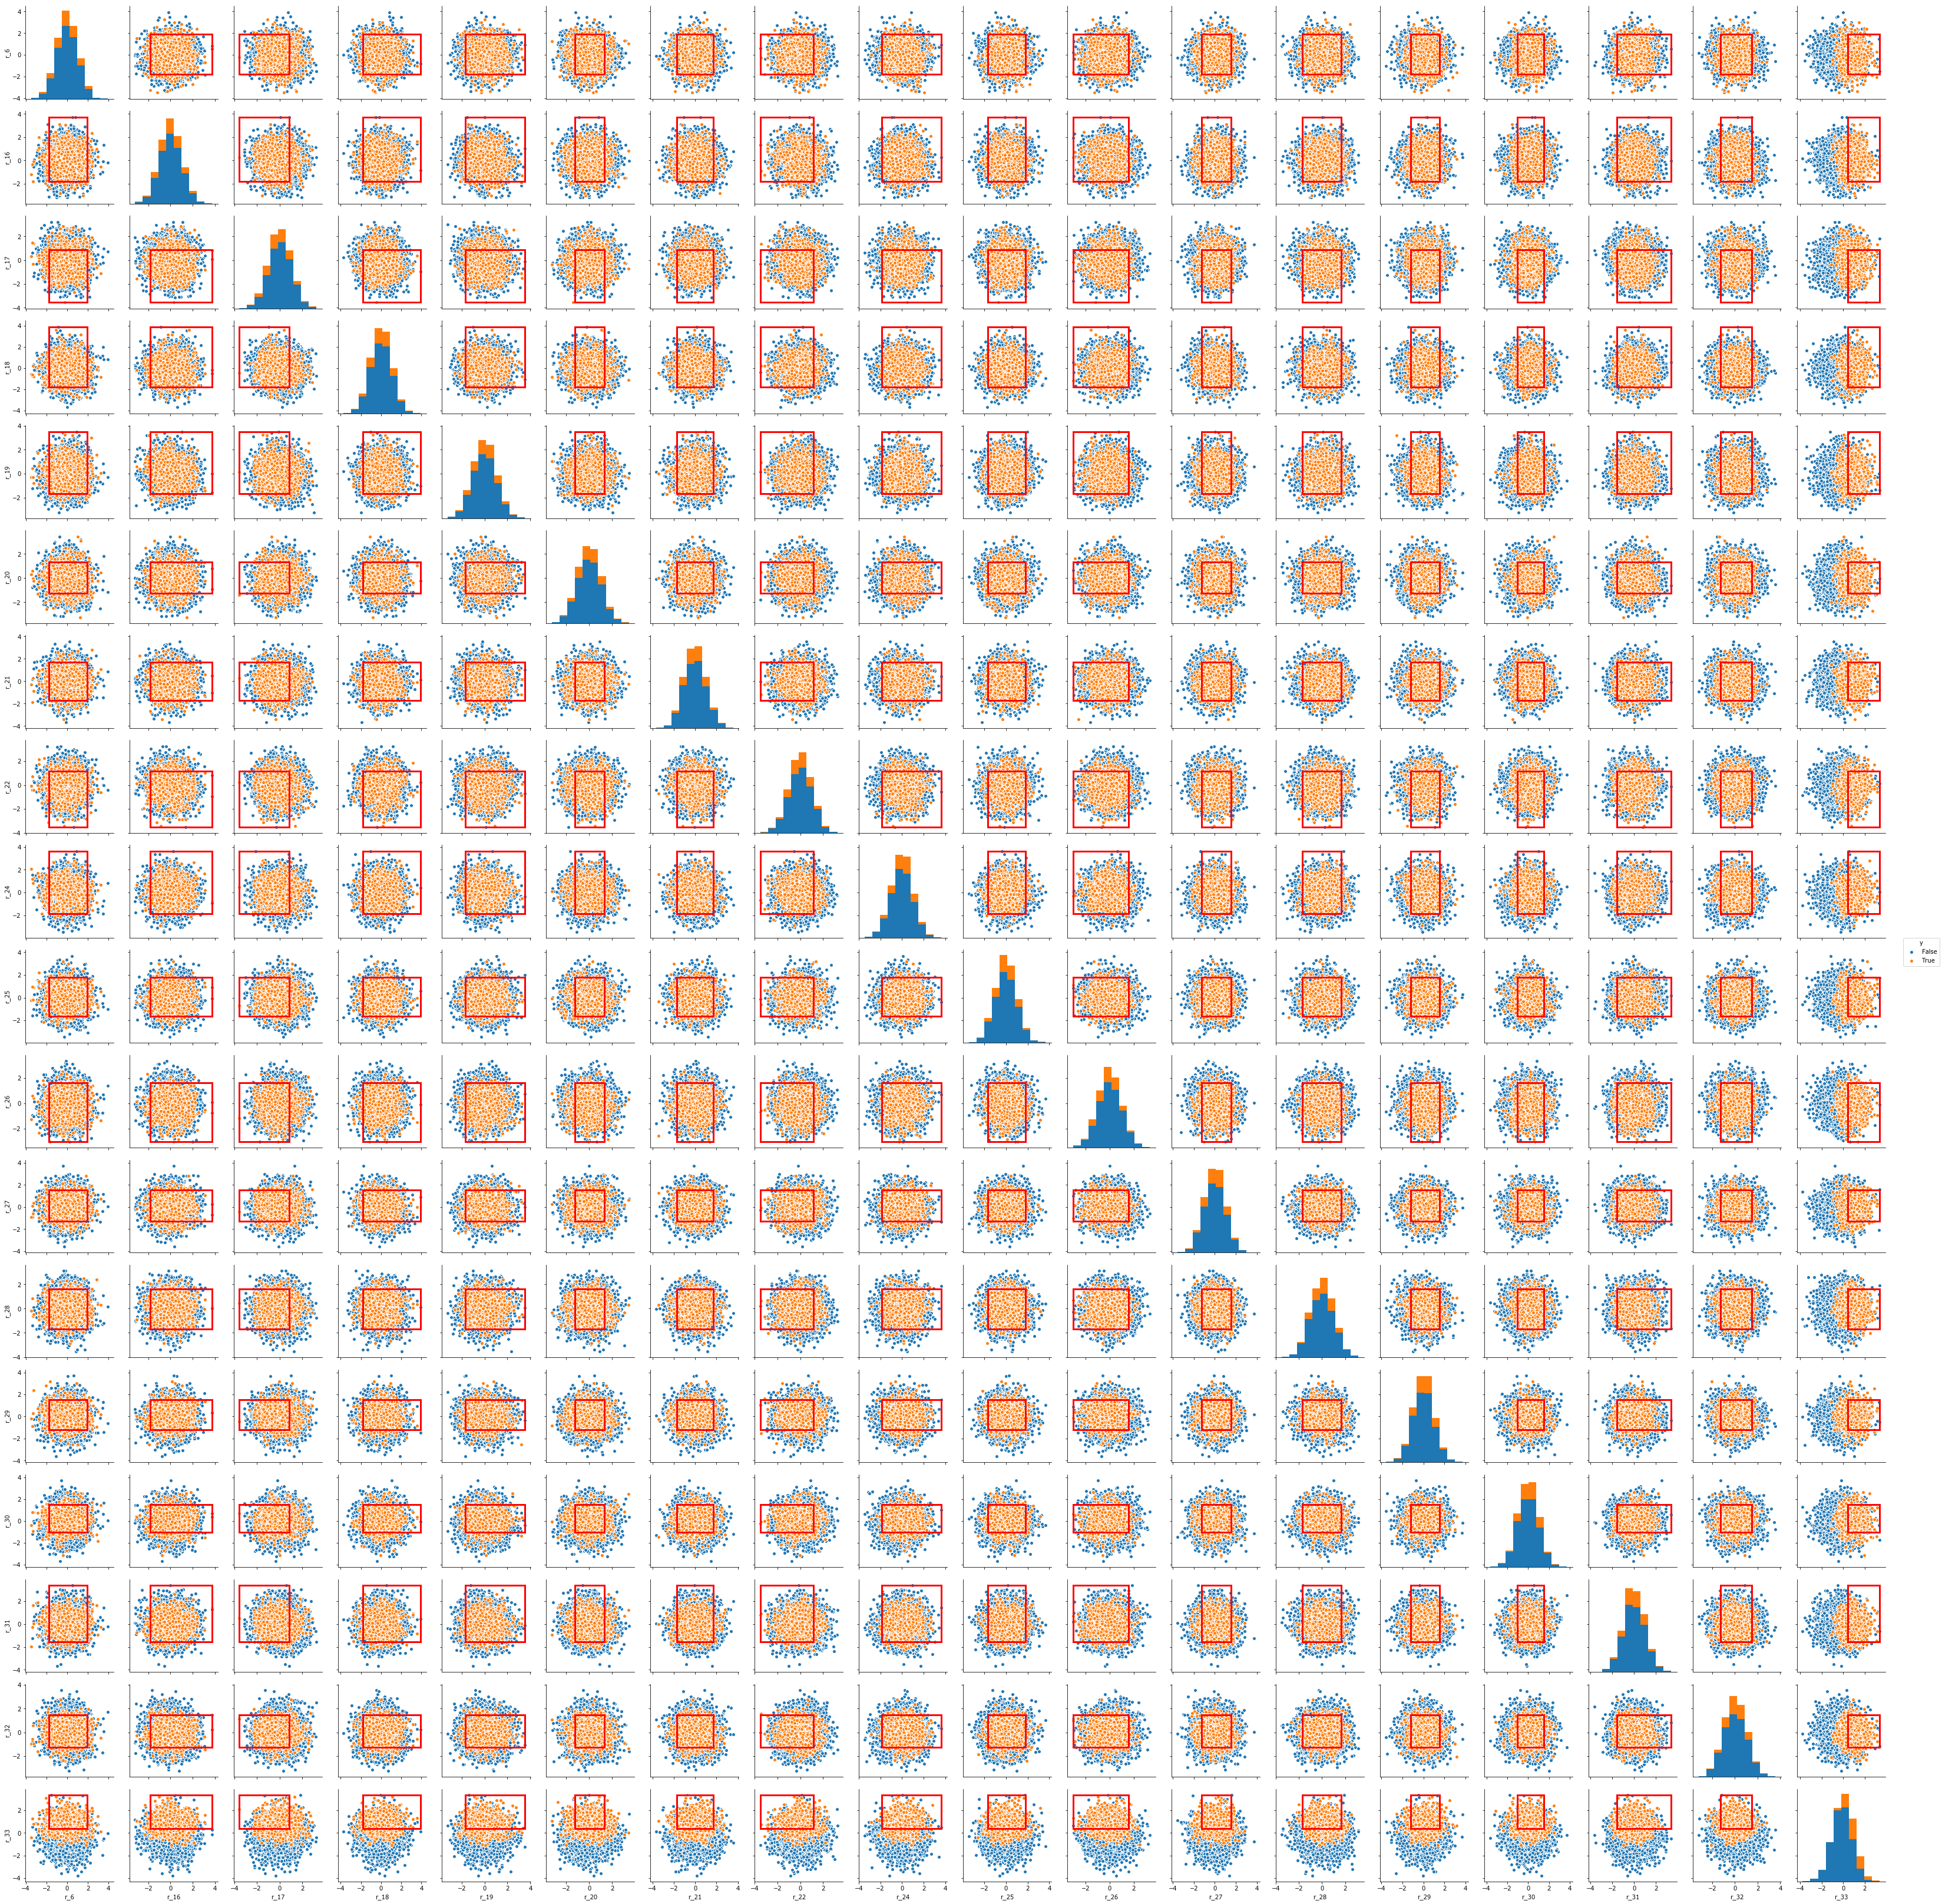

In [114]:
#Dimension coordination changed because of PCA. Different interpretations! 
#The data is now mapped to the new coordination, to be able to capture them with a rectangle
prim_alg = prim.Prim(rotated_experiments, i, threshold=0.3, peel_alpha=0.05)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

box1.inspect()
box1.inspect(style='graph')
plt.show()

box1.show_pairs_scatter()
plt.show()

NameError: name 'box1' is not defined